In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Normalização de Histogram

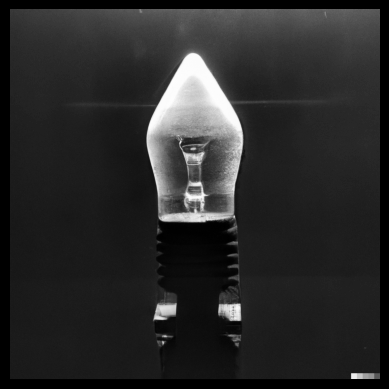

In [2]:
image = cv2.imread('grayscale_ilum_var.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

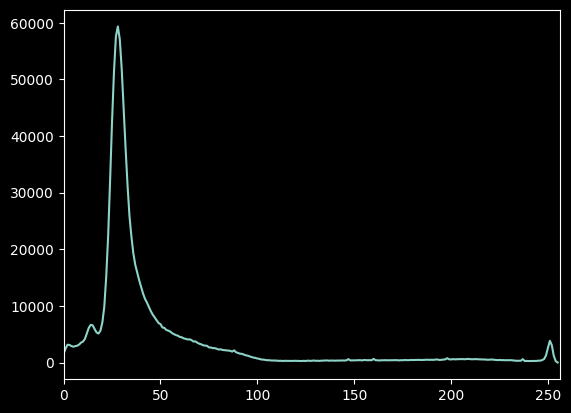

In [3]:
hist, bins = np.histogram(image.flatten(), 256, [0,256])

plt.plot(hist)
plt.xlim([0, 256])
plt.show()

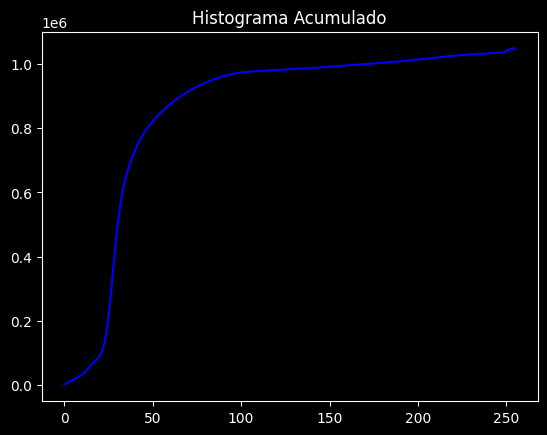

In [4]:
# exibe o histograma acumulado
cdf = np.zeros_like(hist)
cdf[0] = hist[0]
for i in range(1, 256):
    cdf[i] = cdf[i-1] + hist[i]

plt.plot(cdf, color='b')
plt.title('Histograma Acumulado')
plt.show()

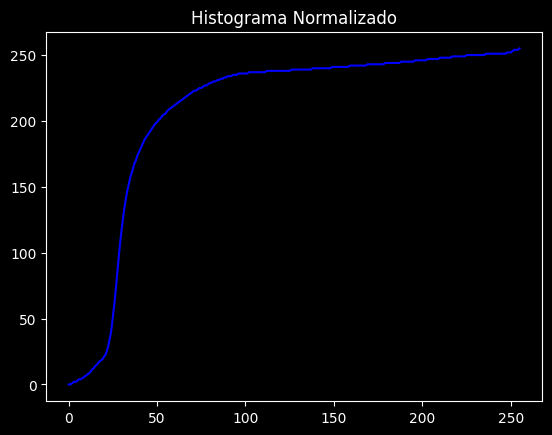

In [5]:
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
# Passo 4: normalizar a CDF para o intervalo [0, 255]
cdf_normalized = np.uint8(cdf_normalized)
plt.plot(cdf_normalized, color='b')
plt.title('Histograma Normalizado')
plt.show()

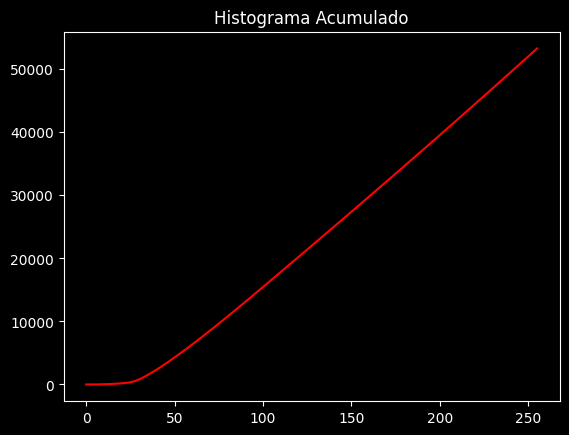

In [6]:
# exibe o histograma acumulado
cdf_accumulated = np.cumsum(cdf_normalized)
plt.plot(cdf_accumulated, color='r')

plt.title('Histograma Acumulado')
plt.show()

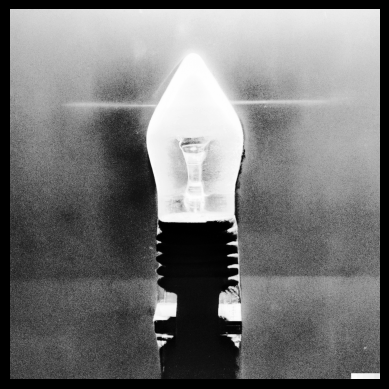

In [7]:
# Passo 5: criar uma nova imagem com todos os pixels inicializados com valor zero
new_image = np.zeros_like(image)

for i in range(256):
    new_image[image == i] = cdf_normalized[i]

plt.imshow(new_image, cmap='gray')
plt.axis('off')
plt.show()

### Teste com imagem colorida

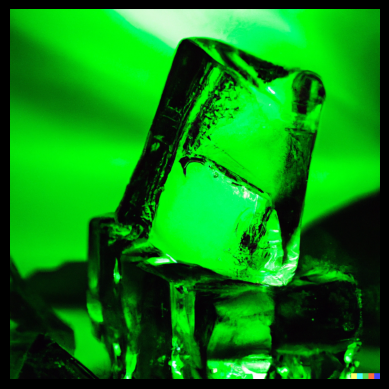

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('green.png', cv2.IMREAD_COLOR)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.imshow(image)
plt.axis('off')
plt.show()


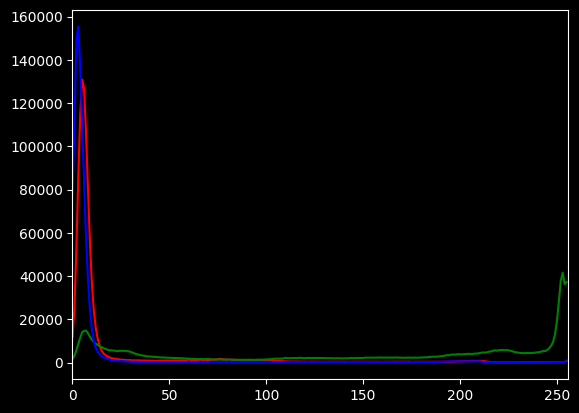

In [103]:
# separar os canais de cor
b, g, r = cv2.split(image)

# calcular os histogramas para cada canal de cor
hist_r, bins_r = np.histogram(r.flatten(), 256, [0,256])
hist_g, bins_g = np.histogram(g.flatten(), 256, [0,256])
hist_b, bins_b = np.histogram(b.flatten(), 256, [0,256])

# exibir os histogramas na mesma figura
plt.plot(hist_r, color='red')
plt.plot(hist_g, color='green')
plt.plot(hist_b, color='blue')
plt.xlim([0, 256])
plt.show()

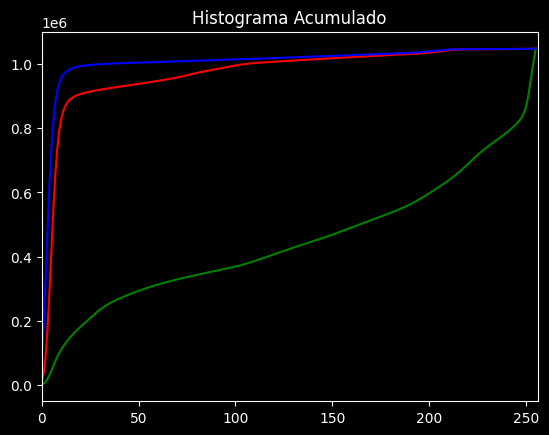

In [104]:
cdf_r = np.zeros_like(hist_r)
cdf_g = np.zeros_like(hist_g)
cdf_b = np.zeros_like(hist_b)

cdf_r[0] = hist_r[0]
cdf_g[0] = hist_g[0]
cdf_b[0] = hist_b[0]

for i in range(1, 256):
    cdf_r[i] = cdf_r[i-1] + hist_r[i]
    cdf_g[i] = cdf_g[i-1] + hist_g[i]
    cdf_b[i] = cdf_b[i-1] + hist_b[i]


plt.plot(cdf_r, color='red')
plt.plot(cdf_g, color='green')
plt.plot(cdf_b, color='blue')
plt.xlim([0, 256])
plt.title('Histograma Acumulado')
plt.show()

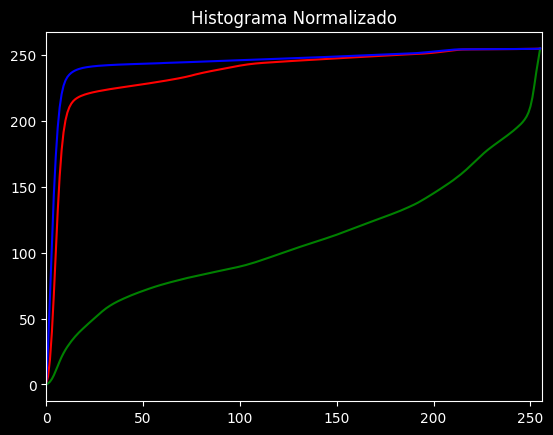

In [105]:
cdf_normalized_r = (cdf_r - cdf_r.min()) * 255 / (cdf_r.max() - cdf_r.min())
cdf_normalized_g = (cdf_g - cdf_g.min()) * 255 / (cdf_g.max() - cdf_g.min())
cdf_normalized_b = (cdf_b - cdf_b.min()) * 255 / (cdf_b.max() - cdf_b.min())

plt.plot(cdf_normalized_r, color='red')
plt.plot(cdf_normalized_g, color='green')
plt.plot(cdf_normalized_b, color='blue')
plt.xlim([0, 256])
plt.title('Histograma Normalizado')
plt.show()

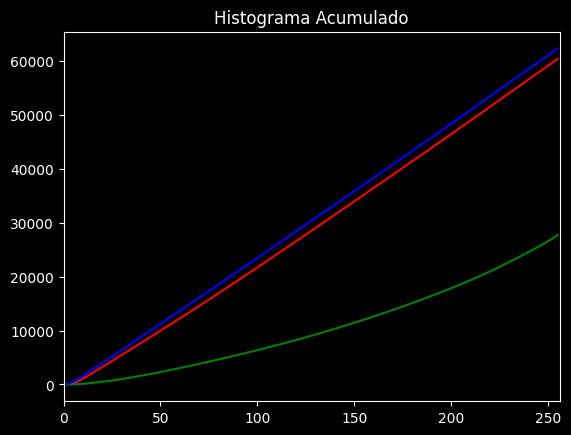

In [106]:
# exibe o histograma acumulado
cdf_accumulated_r = np.cumsum(cdf_normalized_r)
cdf_accumulated_g = np.cumsum(cdf_normalized_g)
cdf_accumulated_b = np.cumsum(cdf_normalized_b)


plt.plot(cdf_accumulated_r, color='red')
plt.plot(cdf_accumulated_g, color='green')
plt.plot(cdf_accumulated_b, color='blue')
plt.xlim([0, 256])
plt.title('Histograma Acumulado')
plt.show()

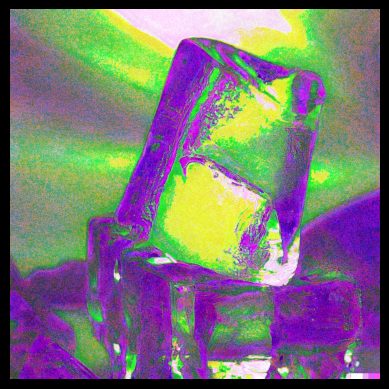

In [107]:
# Passo 5: criar uma nova imagem com todos os pixels inicializados com valor zero
new_image_r = np.interp(r.flatten(), bins_r[:-1], cdf_normalized_r)
new_image_g = np.interp(g.flatten(), bins_g[:-1], cdf_normalized_g)
new_image_b = np.interp(b.flatten(), bins_b[:-1], cdf_normalized_b)

new_image = np.zeros_like(image)
new_image[:,:,2] = new_image_b.reshape(image[:,:,2].shape)
new_image[:,:,1] = new_image_g.reshape(image[:,:,1].shape)
new_image[:,:,0] = new_image_r.reshape(image[:,:,0].shape)

plt.imshow(new_image)
plt.axis('off')
plt.show()

## Negativo

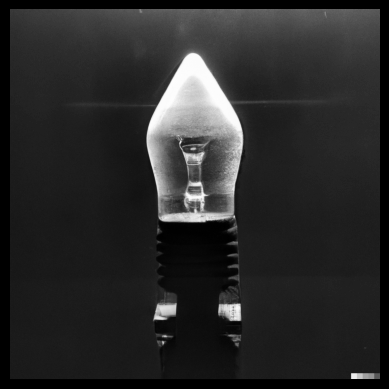

In [91]:
image = cv2.imread('grayscale_ilum_var.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

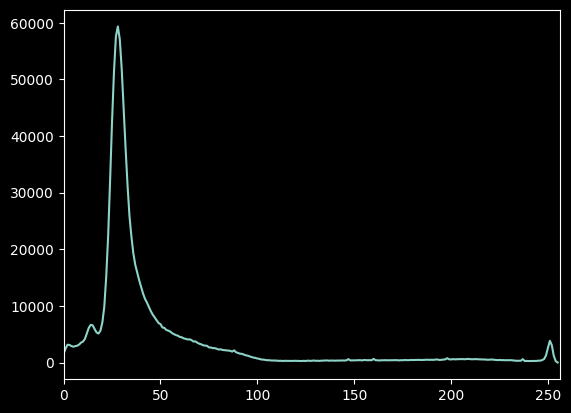

In [92]:
hist, bins = np.histogram(image.flatten(), 256, [0,256])

plt.plot(hist)
plt.xlim([0, 256])
plt.show()

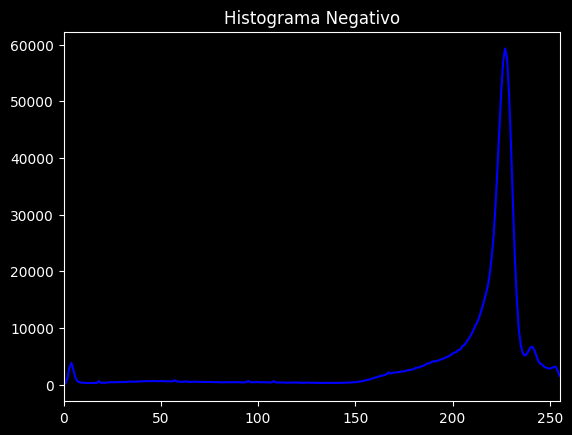

In [93]:
# Calcula o negativo da imagem
neg = 255 - image

hist_neg, bins = np.histogram(neg.ravel(), bins=256, range=(0, 256))
plt.plot(hist_neg, color='b')
plt.xlim([0, 255])
plt.title('Histograma Negativo')
plt.show()

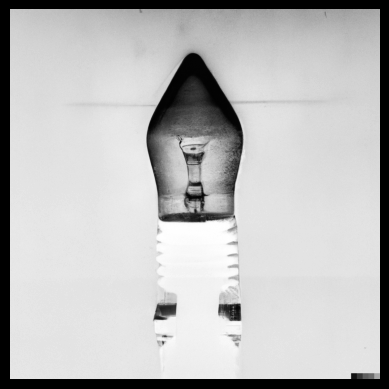

In [94]:
new_neg = np.zeros_like(neg)

for i in range(256):
    new_neg[neg == i] = 255 - i

# Calcula o negativo da nova imagem
new_img = 255 - new_neg

# Plota a imagem
plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.show()

### Para imagem colorida

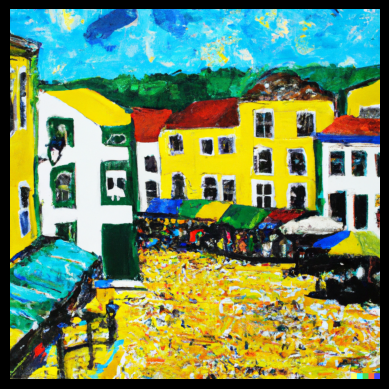

In [65]:
# carrega a imagem no espaço de cores RGB
image = cv2.imread('colorido.png', cv2.IMREAD_COLOR)

# converte a imagem para o espaço de cores BGR
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# exibe a imagem original
plt.imshow(image)
plt.axis('off')
plt.show()

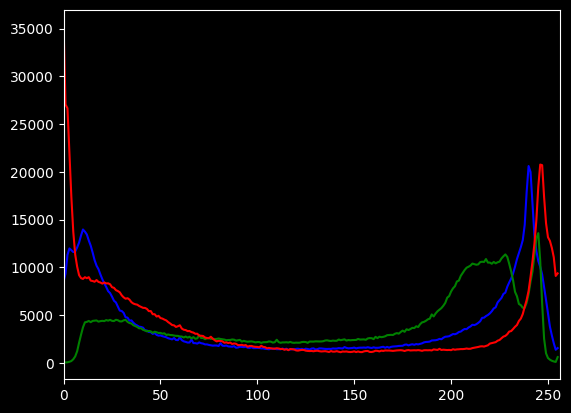

In [66]:
# separar os canais de cor
b, g, r = cv2.split(image)

# calcular os histogramas para cada canal de cor
hist_b, bins_b = np.histogram(b.flatten(), 256, [0,256])
hist_g, bins_g = np.histogram(g.flatten(), 256, [0,256])
hist_r, bins_r = np.histogram(r.flatten(), 256, [0,256])

# exibir os histogramas na mesma figura
plt.plot(hist_b, color='blue')
plt.plot(hist_g, color='green')
plt.plot(hist_r, color='red')
plt.xlim([0, 256])
plt.show()

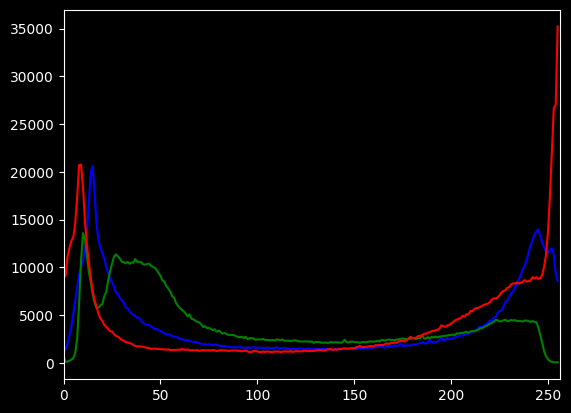

In [67]:
neg = 255 - image

# separar os canais de cor
b, g, r = cv2.split(neg)

# calcular os histogramas para cada canal de cor
hist_b, bins_b = np.histogram(b.flatten(), 256, [0,256])
hist_g, bins_g = np.histogram(g.flatten(), 256, [0,256])
hist_r, bins_r = np.histogram(r.flatten(), 256, [0,256])

# exibir os histogramas na mesma figura
plt.plot(hist_b, color='blue')
plt.plot(hist_g, color='green')
plt.plot(hist_r, color='red')
plt.xlim([0, 256])
plt.show()

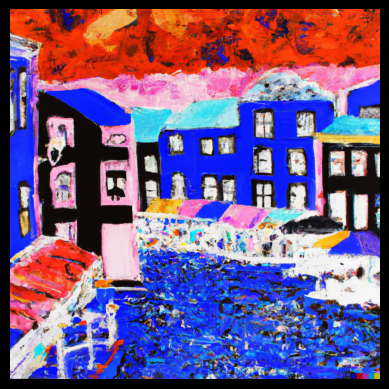

In [68]:
# exibe a imagem invertida
plt.imshow(neg)
plt.axis('off')
plt.show()